In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/Life Expectancy Data.csv")

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.shape

(2938, 22)

In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
mis_col = [ 'Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',' BMI ',  'Polio', 'Total expenditure',
       'Diphtheria ',  'GDP', 'Population',' thinness  1-19 years', ' thinness 5-9 years','Income composition of resources',
           'Schooling']
for i in mis_col:
    df.loc[df.loc[:,i].isnull(),i] = df.loc[:,i].median()
print("count of NULL values after imputation")
df.isnull().sum()

count of NULL values after imputation


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [11]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


<ipython-input-12-452e07cc6c88>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


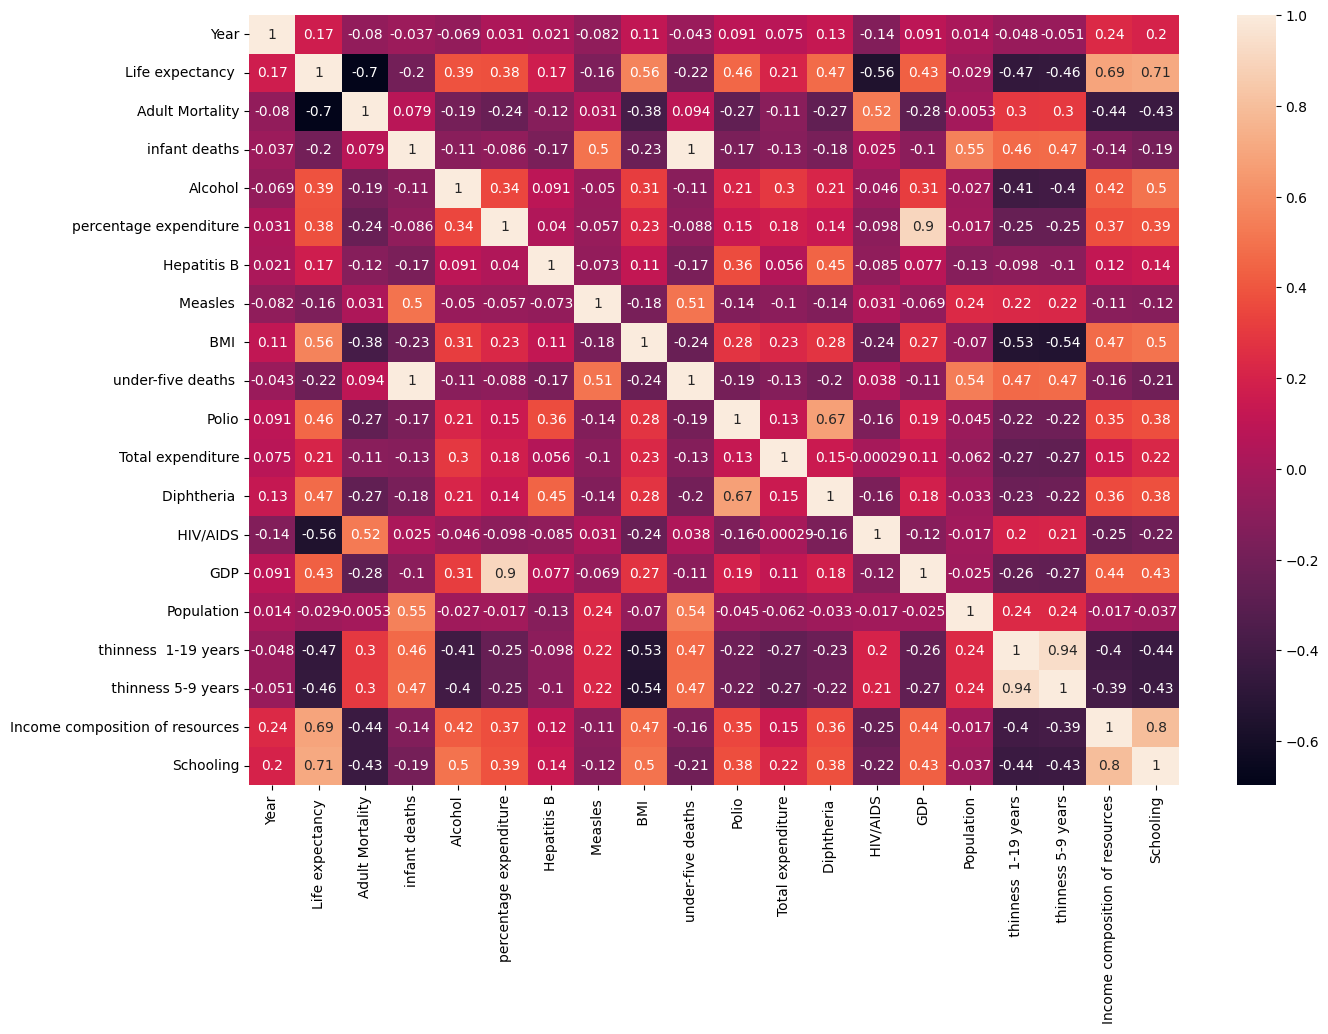

In [12]:
plt.figure(figsize = (15, 10))

sns.heatmap(df.corr(), annot = True)
plt.show()

In [13]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<Axes: xlabel='Life expectancy ', ylabel='Status'>

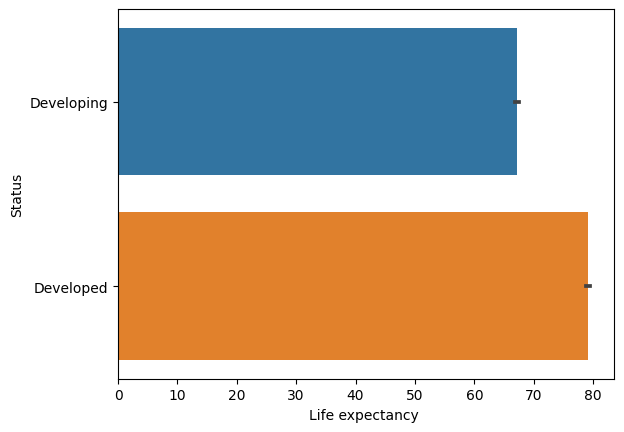

In [14]:
sns.barplot(x=df['Life expectancy '], y=df['Status'])

In [15]:
sort_country = df.groupby('Country')['Life expectancy '].mean().sort_values(ascending = False)
sort_country.head(10),sort_country.tail(10)

(Country
 Japan          82.53750
 Sweden         82.51875
 Iceland        82.44375
 Switzerland    82.33125
 France         82.21875
 Italy          82.18750
 Spain          82.06875
 Australia      81.81250
 Norway         81.79375
 Canada         81.68750
 Name: Life expectancy , dtype: float64,
 Country
 Nigeria                     51.35625
 Swaziland                   51.32500
 Zimbabwe                    50.48750
 Côte d'Ivoire               50.38750
 Chad                        50.38750
 Malawi                      49.89375
 Angola                      49.01875
 Lesotho                     48.78125
 Central African Republic    48.51250
 Sierra Leone                46.11250
 Name: Life expectancy , dtype: float64)

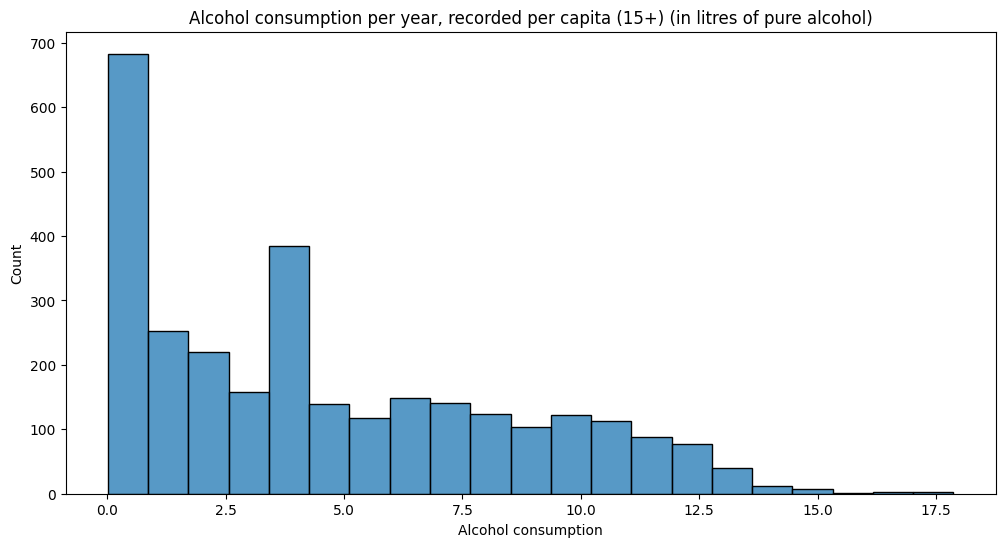

In [16]:
plt.figure(figsize=(12, 6))
plt.title('Alcohol consumption per year, recorded per capita (15+) (in litres of pure alcohol)')
plt.xlabel('Alcohol consumption')
plt.ylabel('Count')

sns.histplot(x=df['Alcohol']);

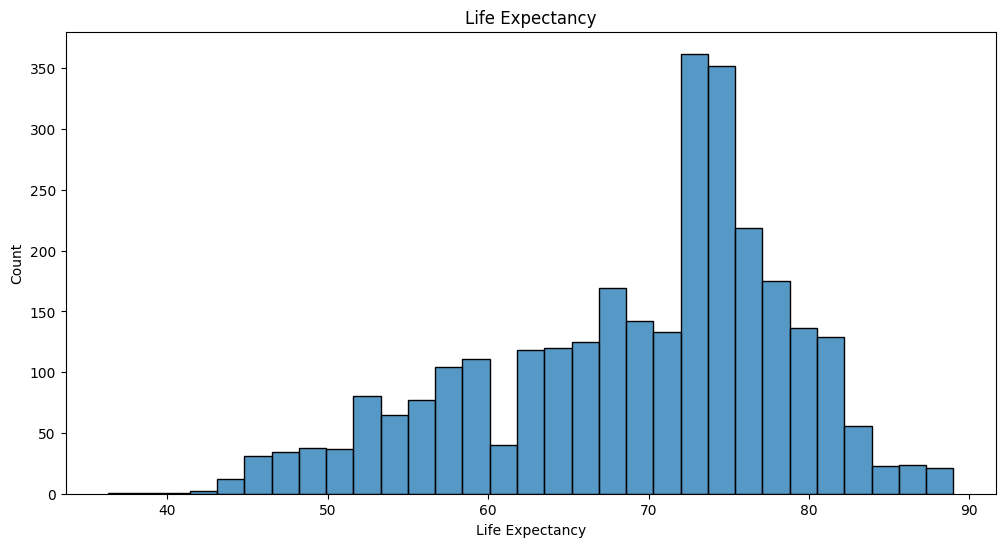

In [17]:
plt.figure(figsize=(12, 6))
plt.title('Life Expectancy')
plt.ylabel('Count')
plt.xlabel('Life Expectancy')

sns.histplot(x=df['Life expectancy ']);

In [18]:
highest_life_expectancy_per_country_df = df.loc[df.groupby('Country')['Life expectancy '].idxmax()]
highest_LE_year_counts = highest_life_expectancy_per_country_df['Year'].value_counts()


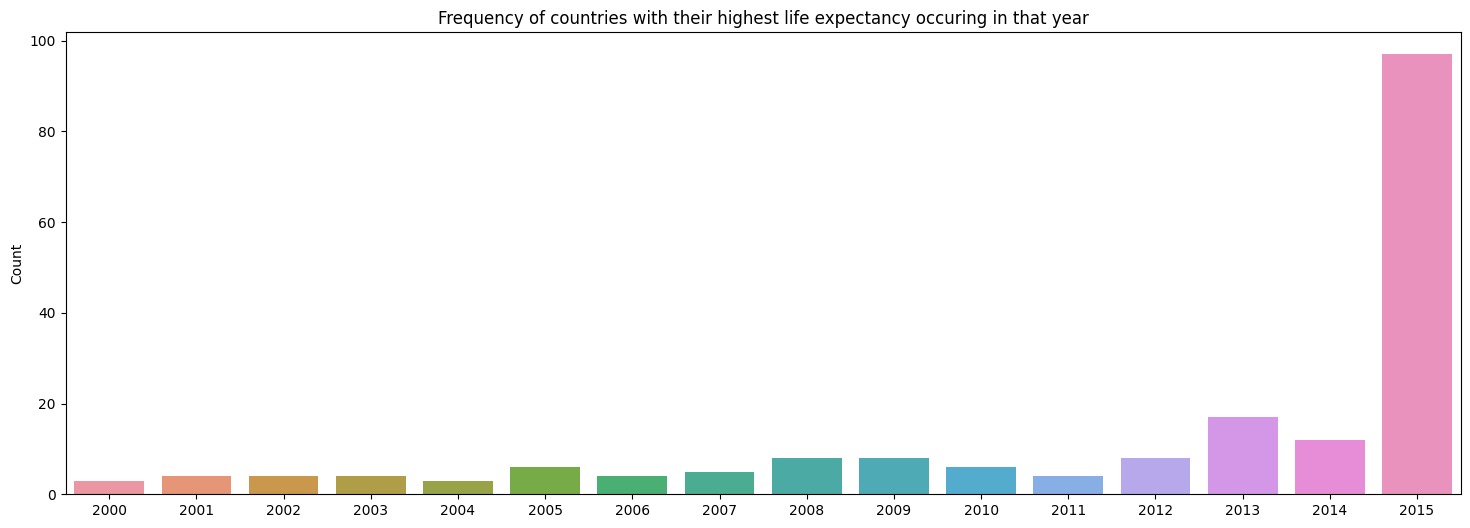

In [19]:
plt.figure(figsize=(18, 6))
sns.barplot(x=highest_LE_year_counts.index, y=highest_LE_year_counts)
plt.title("Frequency of countries with their highest life expectancy occuring in that year");
plt.ylabel('Count');

In [20]:
status_counts = df['Status'].value_counts()
status_counts

Developing    2426
Developed      512
Name: Status, dtype: int64

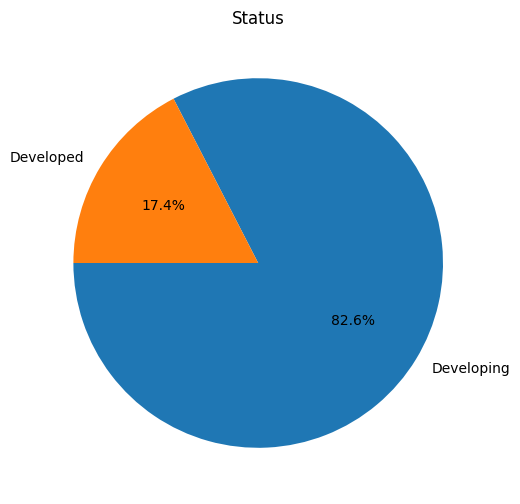

In [21]:
plt.figure(figsize=(12,6))
plt.title('Status')
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=180);

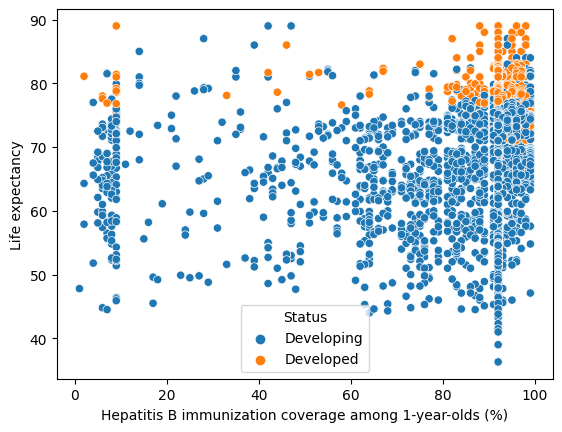

In [22]:
sns.scatterplot(x='Hepatitis B', y='Life expectancy ', hue='Status', data=df)
plt.xlabel("Hepatitis B immunization coverage among 1-year-olds (%)");
plt.ylabel("Life expectancy");

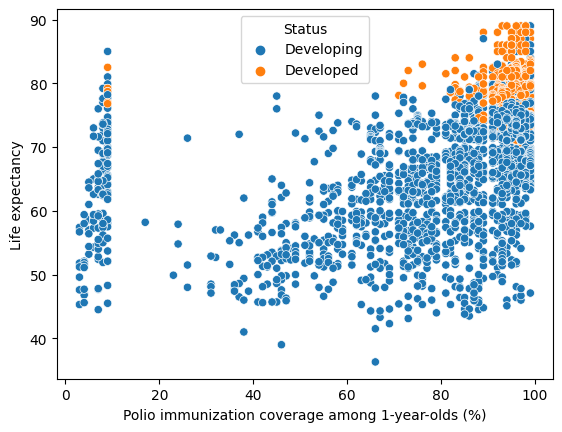

In [23]:
sns.scatterplot(x='Polio', y='Life expectancy ', hue='Status', data=df)
plt.xlabel("Polio immunization coverage among 1-year-olds (%)");
plt.ylabel("Life expectancy");

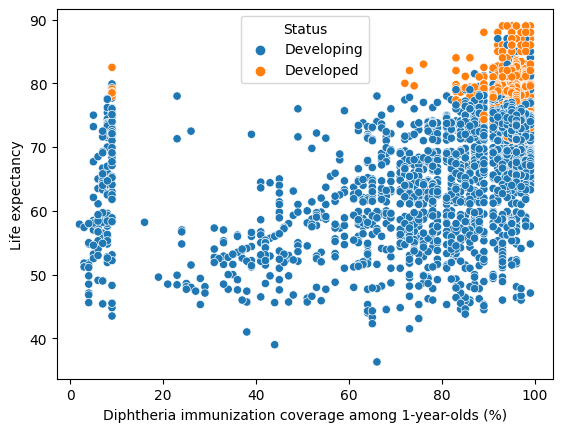

In [24]:
sns.scatterplot(x='Diphtheria ', y='Life expectancy ', hue='Status', data=df)
plt.xlabel("Diphtheria immunization coverage among 1-year-olds (%)");
plt.ylabel("Life expectancy");

Major points of this analysis

1:- 183 countries have been represented in this dataset where 17.5% are developed while the rest of the countries are still developing

2:- Above 75% of the countries have life expectancy above 60. And around 25% of the countries have life expectancy ranging from 70 to 75

3:- More than half of the countries reached their highest life expectancy in 2015

4:- About half of the countries' annual alcohol cosumption per capita lies between 0 - 4 liters

5:- hepatitis B, polio and diphtheria immunization coverage is directly proportional to life expectancy because increasing vaccinations for children and giving the doses correctly for the preventaion of the diseases

